# [Video Game]
#### Data World 
    *https://data.world/craigkelly/steam-game-data
    [Shareholder] They are a publisher, they want buy a new team but want to make sure they make good choice
        [Question1] Can we build a predict/regression model to predict a potential interval for steamspyowners? 
        [Question2] Metacritic scores are from 0 -100. Could we build a classifer model?
#### Kaggle
	*https://www.kaggle.com/gregorut/videogamesales
	*https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
	*https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
     [Shareholder] They are a publisher is looking for recommendations for what types of game to make
         [Question1] Can we pridict Global_Sales


# Video Game Sales Model
### Goals
This project aims to answer 2 questions

* Rather the population size of a region has a relation to carbon emissions.
* Was there a significant effect on carbon emissions based on year and state

### Project Members:
* Laurent Mundell
* Joe Hart


### Table of Contents
    -Imports
    -Data Sources
    -Methods/Globals/Constants
    -Data Prep
    -Explore Data: Analysis/Visuals
    -Hypothesis Test I
    -Hypothesis Test II


https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# Methods/Globals/Constants

In [2]:
STYLE = {'purple' : '\033[95m',
               'cyan' : '\033[96m',
               'darkcyan' : '\033[36m',
               'blue' : '\033[94m',
               'green' : '\033[92m',
               'yellow' : '\033[93m',
               'red' : '\033[91m',
               'bold' : '\033[1m',
               'underline' : '\033[4m',
               'end' : '\033[0m'
}

# Load Data

In [3]:
_  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)
video_game_df.Genre.unique()
video_game_df.Genre.dropna(inplace = True)
video_game_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [4]:
video_game_df.Genre.dropna(inplace = True)

# Exploratory Data Analysis

In [5]:
video_game_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
display(video_game_df.head())
video_game_df.info()
video_game_df.describe().T

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


# Exploratory Data Visualization

In [7]:
north_am = video_game_df.drop(columns = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

In [9]:
## finding NA values
north_am.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
north_am.replace(to_replace = 'Role-Playing', value = 'roleplaying', inplace = True)

In [11]:
genres = north_am.Genre.dropna().unique()
genres

array(['Sports', 'Platform', 'Racing', 'roleplaying', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

## I cant make a function to do this a better way, so im mnaually going through each genre and pulling the user code

In [12]:
platform = north_am.loc[north_am['Genre']=='Platform']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
platform_avg_user_score = platform.mean()
platform_avg_user_score

7.3014018691588785

In [13]:
platform = north_am.loc[north_am['Genre']=='Sports']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
sports_avg_user_score = platform.mean()
sports_avg_user_score

6.961196736174073

In [14]:
platform = north_am.loc[north_am['Genre']=='Racing']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
racing_avg_user_score = platform.mean()
racing_avg_user_score

7.036193447737916

In [15]:
platform = north_am.loc[north_am['Genre']=='roleplaying']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
roleplaying_avg_user_score = platform.mean()
roleplaying_avg_user_score

7.619515477792736

In [16]:
platform = north_am.loc[north_am['Genre']=='Puzzle']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
puzzle_avg_user_score = platform.mean()
puzzle_avg_user_score

7.174999999999998

In [17]:
platform = north_am.loc[north_am['Genre']=='Misc']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
misc_avg_user_score = platform.mean()
misc_avg_user_score

6.8193621867881555

In [18]:
platform = north_am.loc[north_am['Genre']=='Shooter']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
shooter_avg_user_score = platform.mean()
shooter_avg_user_score

7.041883116883125

In [19]:
platform = north_am.loc[north_am['Genre']=='Simulation']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
simulation_avg_user_score = platform.mean()
simulation_avg_user_score

7.134593023255813

In [20]:
platform = north_am.loc[north_am['Genre']=='Action']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
action_avg_user_score = platform.mean()
action_avg_user_score

7.054043715846988

In [21]:
platform = north_am.loc[north_am['Genre']=='Fighting']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
fighting_avg_user_score = platform.mean()
fighting_avg_user_score

7.302506265664169

In [22]:
platform = north_am.loc[north_am['Genre']=='Adventure']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
adventure_avg_user_score = platform.mean()
adventure_avg_user_score

7.133000000000004

In [23]:
platform = north_am.loc[north_am['Genre']=='Strategy']
platform = platform.replace(to_replace = 'tbd', value = np.nan)
platform = platform['User_Score'].astype(float)
platform.dropna(inplace = True)
strategy_avg_user_score = platform.mean()
strategy_avg_user_score

7.295176848874596

In [24]:
north_am.dropna(inplace = True)
north_am.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,58.0,41.0,6.6,129.0,Nintendo,E


### Graphing global sales vs genres, platform, and rating

In [25]:
def revenue(df):
    totals = []
    for genre in genres:
        series = df.loc[df['Genre']==genre]
        total = series['NA_Sales'].mean()
        totals.append([total])
    return totals

In [26]:
genres = list(genres)
genres

['Sports',
 'Platform',
 'Racing',
 'roleplaying',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

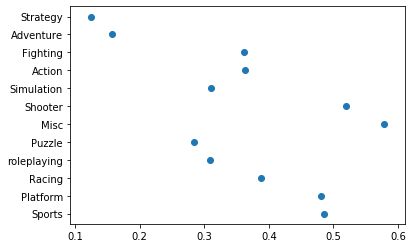

In [28]:
s = revenue(north_am)
plt.scatter(y = genres, x = s)

In [29]:
def user_score_avg(df):
    totals = []
    for genre in genres:
        series = df.loc[df['Genre']==genre]
        total = series['User_Score'].astype(float).mean()
        totals.append([total])
    return totals

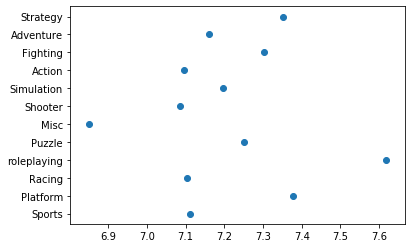

In [31]:
user_scores = user_score_avg(north_am)
plt.scatter(x = user_scores, y = genres)

In [32]:
def user_count_avg(df):
    totals = []
    for genre in genres:
        series = df.loc[df['Genre']==genre]
        total = series['User_Count'].astype(float).mean()
        totals.append([total])
    return totals

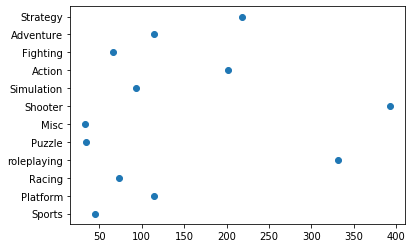

In [34]:
user_count = user_count_avg(north_am)
plt.scatter(x = user_count, y = genres)

In [35]:
def user_score_avg(df):
    totals = []
    for genre in genres:
        series = df.loc[df['Genre']==genre]
        total = series['User_Score'].astype(float).mean()
        totals.append([total])
    return totals

In [36]:
north_am['User_Score'] = north_am['User_Score'].astype(float)

### Graphing all data with a pairplot

In [37]:
import seaborn as sns

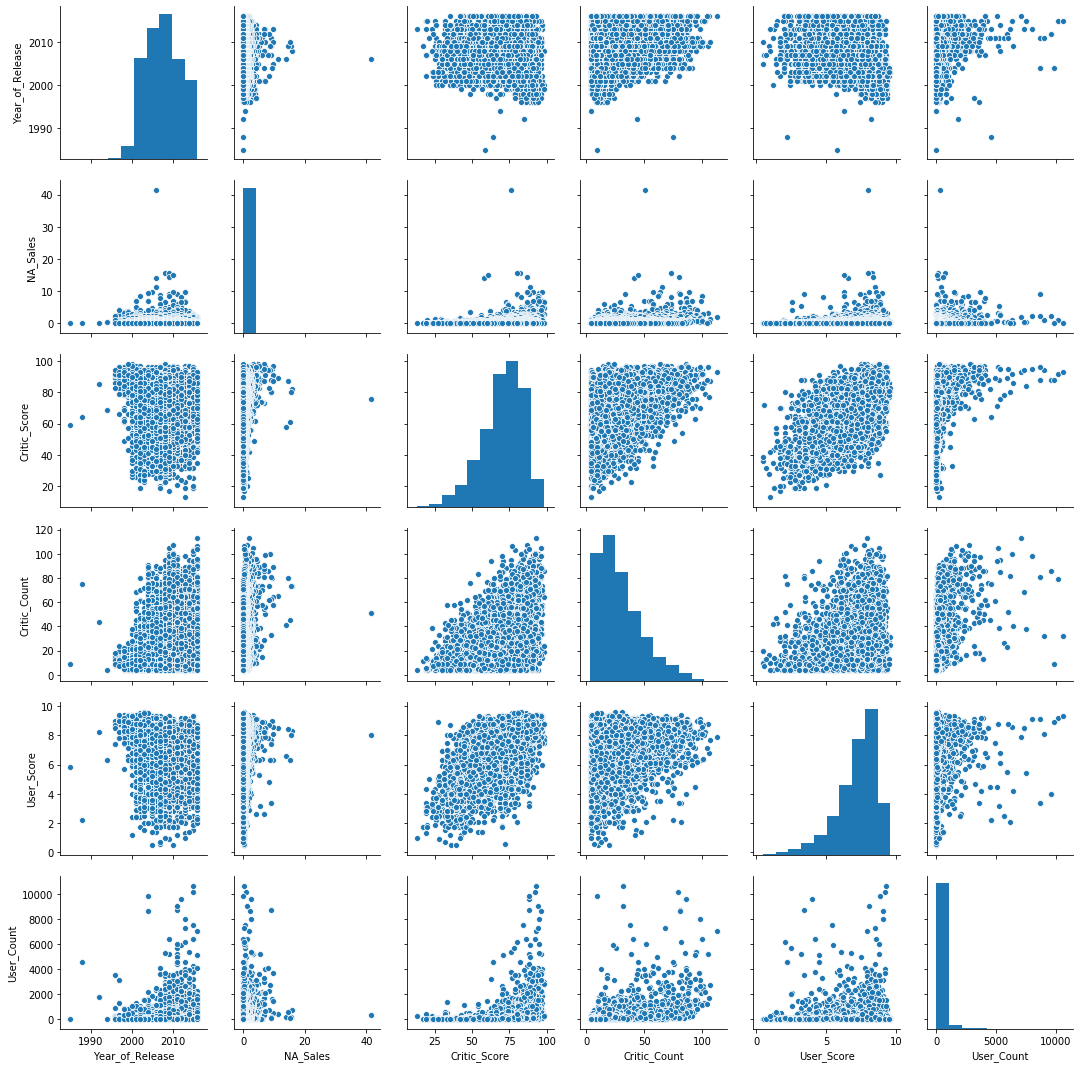

In [38]:
sns.pairplot(north_am);

### Graphing data with a heatmap

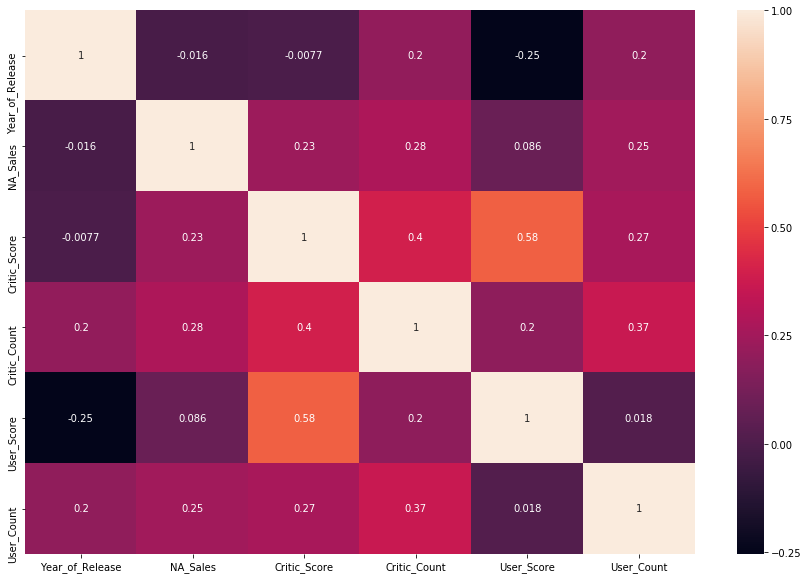

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data = north_am.corr(), annot = True, ax = ax)

In [44]:
# I wanted to see which publishers have released the most games
north_am.Publisher.value_counts()

Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
                              ... 
Monte Christo Multimedia         1
Pinnacle                         1
Max Five                         1
Sunflowers                       1
Kool Kizz                        1
Name: Publisher, Length: 262, dtype: int64

In [46]:
# Further expoloration of the ratings and how many values each rating has
north_am.Rating.value_counts()

T       2377
E       2082
M       1433
E10+     930
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64

In [50]:
# Exploration if the year of release had any pattern with North American Sales
north_am.drop(columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], inplace = True)

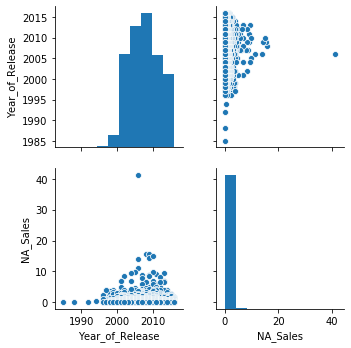

In [52]:
sns.pairplot(north_am)

In [57]:
publishers = list(north_am.Publisher.unique())

In [73]:
# Creating a Function to explore which publishers have the mose North American Sales

def publisher_sales(data):
    totals = []
    for publisher in publishers:
        company = north_am.loc[north_am['Publisher']==publisher]
        total = [publisher, company['NA_Sales'].sum()]
        totals.append(total)
    return totals

In [208]:
list1 = pd.DataFrame(publisher_sales(north_am))
list1

,0,1
7,Electronic Arts,465.45
0,Nintendo,371.36
4,Activision,306.82
2,Take-Two Interactive,187.82
3,Sony Computer Entertainment,176.87
...,...,...
258,CDV Software Entertainment,0.00
179,HMH Interactive,0.00
260,Blue Byte,0.00
228,Alternative Software,0.00


In [218]:
big_publishers = []
other_publishers = []
for i in list1[1]:
    if i > 5:
        big_publishers.append(i)
for i in list1[1]:
    if i <= 5:
        other_publishers.append(i)

In [215]:
big_publishers

[465.45000000000005,
 371.36,
 306.82000000000005,
 187.82,
 176.87000000000003,
 174.92,
 138.9,
 93.97,
 69.99000000000001,
 57.96000000000001,
 51.230000000000004,
 50.699999999999996,
 48.97,
 48.690000000000005,
 41.46000000000001,
 38.71,
 34.56999999999999,
 28.5,
 27.790000000000006,
 24.110000000000003,
 23.48,
 16.59,
 11.59,
 11.44,
 10.38,
 10.25,
 10.09,
 8.25,
 8.07,
 7.449999999999999,
 7.4399999999999995,
 7.200000000000002,
 6.44]

In [213]:
names = list1[0][:33]
len(names)

33

In [210]:
len(big_publishers)

33

In [221]:
len(other_publishers)

229

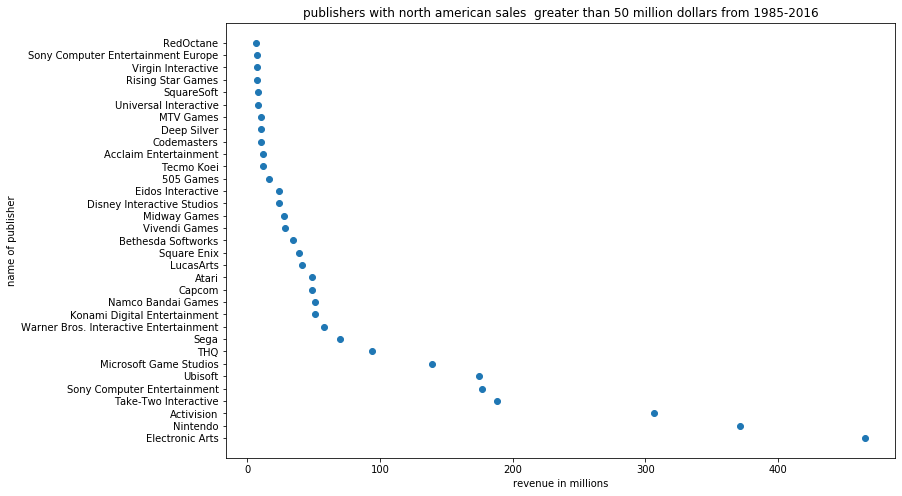

In [214]:
list1.sort_values(by = 1, ascending = False, inplace = True)
plt.figure(figsize = (12,8))
plt.scatter(x=big_publishers, y=names)
plt.xlabel('revenue in millions')
plt.ylabel('name of publisher')
plt.title('publishers with north american sales  greater than 50 million dollars from 1985-2016')
plt.show()

In [133]:
north_am.Platform.value_counts()
platforms = north_am.Platform.unique()
list(platforms)
wii = north_am.loc[north_am['Platform']=='Wii']
wii['NA_Sales'].sum()

342.91

In [270]:
def platform_sales(data):
    totals = []
    for platform in platforms:
        objective = north_am.loc[north_am['Platform']==platform]
        total = [platform, objective['NA_Sales'].sum()]
        totals.append(total)
    return totals

In [274]:
platform_performance = pd.DataFrame(platform_sales(north_am))
platform_performance.sort_values(by=1,ascending = False, inplace = True)
platform_performance

,0,1
2,X360,533.43
4,PS2,472.65
0,Wii,342.91
3,PS3,341.62
1,DS,173.40
8,XB,153.23
12,GC,107.93
7,PS,91.76
6,PS4,84.16
10,PSP,81.70


Text(0.5, 1.0, 'amount of money spent towards games sorted by console')

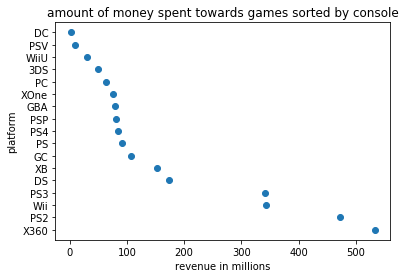

In [266]:
plt.scatter(y = platform_performance[0], x = platform_performance[1])
plt.xlabel('revenue in millions')
plt.ylabel('platform')
plt.title('amount of money spent towards games sorted by console')

In [168]:
def genre_sales(data):
    totals = []
    for genre in genres:
        objective = north_am.loc[north_am['Genre']==genre]
        total = [genre, objective['NA_Sales'].sum()]
        totals.append(total)
    return totals

In [229]:
genre_performance = pd.DataFrame(genre_sales(north_am))

In [230]:
genre_performance.sort_values(by = 1, ascending = False, inplace = True)

In [231]:
genre_performance

,0,1
8,Action,591.23
0,Sports,457.52
6,Shooter,448.76
2,Racing,225.59
5,Misc,222.05
3,roleplaying,219.53
1,Platform,193.60
9,Fighting,136.39
7,Simulation,92.12
10,Adventure,38.81


Text(0.5, 1.0, 'how much money each genre of game has made')

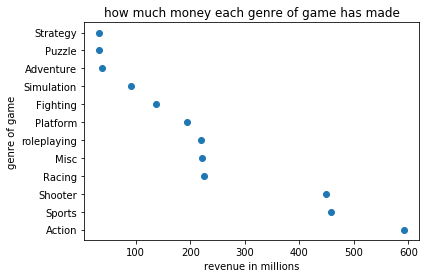

In [177]:
plt.scatter(x = genre_performance[1], y = genre_performance[0])
plt.xlabel('revenue in millions')
plt.ylabel('genre of game')
plt.title('how much money each genre of game has made')

In [181]:
ratings = list(north_am.Rating.unique())

In [182]:
def rating_sales(data):
    totals = []
    for rating in ratings:
        objective = north_am.loc[north_am['Rating']==rating]
        total = [rating, objective['NA_Sales'].sum()]
        totals.append(total)
    return totals

In [186]:
rating_performance = pd.DataFrame(rating_sales(north_am))
rating_performance.sort_values(by = 1, ascending = False, inplace = True)

Text(0.5, 1.0, 'how much money each type of genre has generated')

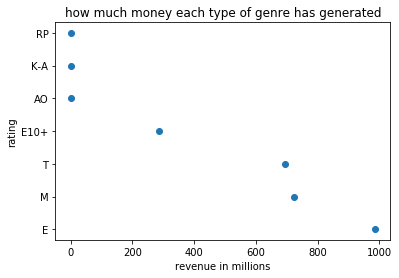

In [189]:
plt.scatter(x = rating_performance[1], y = rating_performance[0])
plt.xlabel('revenue in millions')
plt.ylabel('rating')
plt.title('how much money each type of genre has generated')

In [248]:
from sklearn import preprocessing

In [249]:
north_am.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,Nintendo,E


In [261]:
enc = preprocessing.OneHotEncoder()

In [235]:
# enc()

In [278]:
platform_performance = platform_performance.to_numpy()

In [268]:
X = platform_performance
y = north_am.N

In [269]:
enc.fit(X)
transformed_platforms = enc.transform(X)
transformed_platforms

<17x34 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [280]:
platform_performance

array([['X360', 533.43],
       ['PS2', 472.65],
       ['Wii', 342.91],
       ['PS3', 341.62],
       ['DS', 173.4],
       ['XB', 153.23],
       ['GC', 107.92999999999999],
       ['PS', 91.75999999999999],
       ['PS4', 84.16000000000001],
       ['PSP', 81.69999999999999],
       ['GBA', 79.39000000000001],
       ['XOne', 75.58],
       ['PC', 63.760000000000005],
       ['3DS', 48.669999999999995],
       ['WiiU', 30.69],
       ['PSV', 9.930000000000001],
       ['DC', 1.54]], dtype=object)